<a href="https://colab.research.google.com/github/hursoo/Digital_History/blob/main/dh_gb_socialism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1_데이터 불러오기

## 1) 라이브러리, 구글 마운트

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

Mounted at /content/drive


## 2) 파일 불러오기

In [ ]:
import pandas as pd

In [ ]:
url = 'https://github.com/hursoo/Digital_History/raw/main/gb_corpus.xlsx'

In [ ]:
df = pd.read_excel(url, index_col = 0)
df

,sent_id,sent_raw,sent_split,r_no,title,writer,w_new,ho_no,year,month,grid
0,1,創刊辭,창간 辭,1,創刊辭,-,uk01,1,1920,6,01hf
1,2,强者도 부르짖고 弱者도 부르짖으며 優者도 부르짖고 劣者도 부르짖도다,강자 약자 優者 劣者,1,創刊辭,-,uk01,1,1920,6,01hf
2,3,東西南北 四海八方이 다같이 소리中에 묻혀 있도다,동서 남북 사해 팔방 소리,1,創刊辭,-,uk01,1,1920,6,01hf
3,4,霹靂이냐 地震이냐 神籟이냐 魔哭이냐 우리는 아즉 이 소리의 正邪를 判斷할 수 없도다,소리 판단,1,創刊辭,-,uk01,1,1920,6,01hf
4,5,左右間 多數가 渴仰하고 多數가 要求하는 人民의 소리임은 明白하도다,間 좌우 다수 갈앙 다수 요구 인민 소리 명백,1,創刊辭,-,uk01,1,1920,6,01hf
...,...,...,...,...,...,...,...,...,...,...,...
34025,34026,어떠케 되엿던지 만약 미국과 영국간에 전쟁이 生起인다면 영국의 또미니온인 캐나다는 ...,미국 영국 전쟁 生起 영국 캐나다 미국 양식 힘 영국,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,12hf
34026,34027,이 비밀은 여러분과 나 외에 또 政客 셋이 알고 잇음니다,비밀 정객,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,12hf
34027,34028,그것은 미국과 영국과 캐나다임니다,미국 영국 캐나다,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,12hf
34028,34029,미국의 물질적 권력은 대개 이러함니다,미국 물질 권력,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,12hf


In [ ]:
df[:3].to_csv('imsi.txt')

# 2_논조를 반영하는 특성 추출

## 1) 문서-단어 행렬(dtm) 산출 함수

In [ ]:
def get_dtm(df, col_name, rank_n): # rank_n : 고빈도 단어 n 순위까지
    # 단어 종류 모두 벡터화. 2음절 이상
    tv = TfidfVectorizer(norm=None)
    dtm = tv.fit_transform(df[col_name])

    # df 형태로 표시
    dtm_df = pd.DataFrame(dtm.toarray(), columns=tv.get_feature_names_out(), index=df.index)

    highword_list = dtm_df.sum().sort_values(ascending=False)[:rank_n].index.to_list()
    feature_df = dtm_df[highword_list] # 열 순서는 tfidf값이 높은 것부터 낮은 순으로 정렬
    return feature_df

## 2) 특성 및 특성벡터
- tfidf 고빈도 50위 단어

In [ ]:
dtm50_df = get_dtm(df, 'sent_split', 50)
dtm50_df

,사회,朝鮮,主義,사람,생활,민족,계급,운동,문제,사상,...,혁명,현상,중국,생산,意識,문명,발달,개조,세력,현대
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34025,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34026,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34027,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34028,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#3_시기 구분하기
- 시기 구분 : 논조 변화를 관찰하는 마디

## 1) dtm50 + 구간(grid) = gtm50 산출하기

In [ ]:
def transform_to_gtm(df, grid_col, dtm_df): # 인자 - df, 구간 정보 열, dtm50_df
    # 구간정보만 df로 추출
    grid_df = df[[grid_col]]
    # 구간 정보 결합하고, 구간을 index로 만듦
    temp_dtm = pd.concat([dtm_df, grid_df], axis=1)
    grid_dtm = temp_dtm.set_index(grid_col)
    # 구간별 평균
    gtm = grid_dtm.groupby(grid_col).mean()
    return gtm

In [ ]:
# 함수 실행하여 gtm 변수에 할당
gtm_df = transform_to_gtm(df, 'grid', dtm50_df)
gtm_df

,사회,朝鮮,主義,사람,생활,민족,계급,운동,문제,사상,...,혁명,현상,중국,생산,意識,문명,발달,개조,세력,현대
grid,,,,,,,,,,,,,,,,,,,,,
01hf,0.271944,0.472733,0.192943,0.208459,0.147433,0.258386,0.050494,0.045739,0.432183,0.105552,...,0.009803,0.147114,0.076029,0.029981,0.007546,0.135268,0.120299,0.073199,0.052803,0.049695
02hf,0.625711,0.274373,0.225143,0.388614,0.269616,0.243439,0.090071,0.097821,0.175976,0.141348,...,0.080946,0.135060,0.094789,0.015801,0.056563,0.132020,0.077635,0.104650,0.053008,0.094288
03hf,0.490501,0.438753,0.211075,0.575399,0.415956,0.230293,0.192807,0.135198,0.167810,0.286910,...,0.056863,0.125467,0.043669,0.029657,0.023073,0.159487,0.079480,0.096696,0.054268,0.109936
04hf,0.440416,0.499501,0.157721,0.438833,0.581222,0.556898,0.232677,0.108117,0.172829,0.253645,...,0.035779,0.053751,0.030865,0.017608,0.150684,0.112229,0.093928,0.373568,0.049365,0.051284
05hf,0.408203,0.749836,0.308904,0.151906,0.637911,0.392019,0.096322,0.166214,0.367271,0.237796,...,0.081038,0.124224,0.488816,0.146865,0.064690,0.092030,0.124021,0.037093,0.101616,0.111827
06hf,0.389655,0.577782,0.599460,0.342614,0.275178,0.521298,0.167920,0.396915,0.227006,0.253995,...,0.227808,0.078647,0.197923,0.070209,0.048936,0.086637,0.045994,0.070931,0.226471,0.139649
07hf,0.351026,0.280699,0.442073,0.483435,0.183179,0.132927,0.305178,0.332030,0.151593,0.146698,...,0.177092,0.111527,0.091188,0.196304,0.068820,0.073806,0.132617,0.074370,0.068794,0.120275
08hf,0.452043,0.278405,0.633590,0.429851,0.136687,0.137239,0.277374,0.259683,0.293151,0.369196,...,0.244317,0.069162,0.028595,0.262168,0.068920,0.052571,0.141690,0.039729,0.134855,0.047801
09hf,0.575766,0.187284,0.344531,0.468642,0.306161,0.159335,0.309684,0.230840,0.163388,0.684191,...,0.186789,0.069554,0.212798,0.143543,0.085531,0.082239,0.043179,0.068070,0.029482,0.125276


## 2) 구간별 상관계수 산출하기

In [ ]:
def make_corr(gtm):
    tgm = gtm.T
    result = tgm.corr()
    return result

In [ ]:
gg_corr = make_corr(gtm_df)
gg_corr

grid,01hf,02hf,03hf,04hf,05hf,06hf,07hf,08hf,09hf,10hf,11hf,12hf
grid,,,,,,,,,,,,
01hf,1.000000,0.564625,0.530992,0.397945,0.351541,0.225748,0.151326,0.171810,0.162783,0.075634,0.056384,0.032827
02hf,0.564625,1.000000,0.813452,0.644209,0.279874,0.387390,0.433851,0.313463,0.453178,0.400312,0.203434,0.156877
03hf,0.530992,0.813452,1.000000,0.743409,0.375713,0.356856,0.453130,0.351910,0.553662,0.486713,0.307898,0.084371
04hf,0.397945,0.644209,0.743409,1.000000,0.415839,0.464513,0.331890,0.204796,0.439162,0.597356,0.245575,0.114006
05hf,0.351541,0.279874,0.375713,0.415839,1.000000,0.402201,0.103731,0.119540,0.183634,0.383983,0.317282,0.108203
06hf,0.225748,0.387390,0.356856,0.464513,0.402201,1.000000,0.514648,0.483415,0.374889,0.506196,0.297203,0.466718
07hf,0.151326,0.433851,0.453130,0.331890,0.103731,0.514648,1.000000,0.737644,0.600434,0.513203,0.584050,0.581128
08hf,0.171810,0.313463,0.351910,0.204796,0.119540,0.483415,0.737644,1.000000,0.716207,0.446782,0.526397,0.647722
09hf,0.162783,0.453178,0.553662,0.439162,0.183634,0.374889,0.600434,0.716207,1.000000,0.454842,0.412120,0.317803


## 3) 히트맵 시각화로 시기구분 하기

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_heatmap(df):
    df = df.copy()
    plt.figure(figsize=(10,4))
    sns.heatmap(data = df, annot=True,
    fmt = '.3f', linewidths=.5, cmap='Blues')

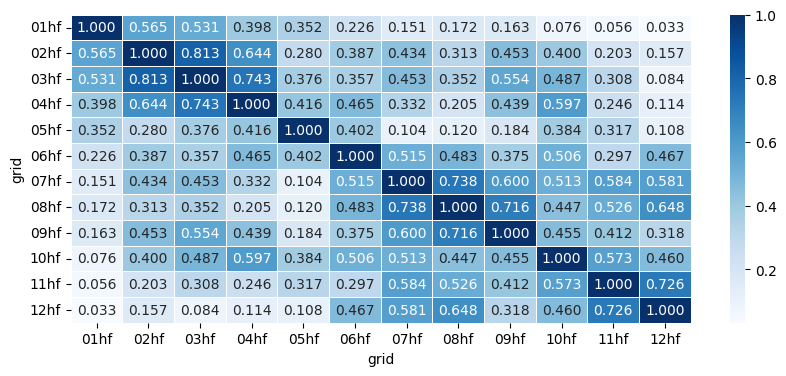

In [ ]:
draw_heatmap(gg_corr)

- 모호한 부분의 시기 구분  
 - 해당 구간이 좌우와 가진 상관계수를 비교  
 - 이 때 비교 범위는 왼쪽(및 오른쪽) 가상 시기에 포함되는 구간들의 상관계수를 평균한 값  
 =>   
    1p : 01hf - 05hf  
    2p : 06hf - 09hf  
    3p : 10hf - 12hf

## 4) 시기별 코퍼스 산출

In [ ]:
prd_1 = ['01hf', '02hf', '03hf', '04hf', '05hf']
prd_2 = ['06hf', '07hf', '08hf', '09hf']
prd_3 = ['10hf', '11hf', '12hf']

In [ ]:
df = df.copy()
df['period'] = '' # df에 새 열('period')을 생성
df.loc[df['grid'].isin(prd_1), 'period'] = '1p'
df.loc[df['grid'].isin(prd_2), 'period'] = '2p'
df.loc[df['grid'].isin(prd_3), 'period'] = '3p'
df

,sent_id,sent_raw,sent_split,r_no,title,writer,w_new,ho_no,year,month,grid,period
0,1,創刊辭,창간 辭,1,創刊辭,-,uk01,1,1920,6,01hf,1p
1,2,强者도 부르짖고 弱者도 부르짖으며 優者도 부르짖고 劣者도 부르짖도다,강자 약자 優者 劣者,1,創刊辭,-,uk01,1,1920,6,01hf,1p
2,3,東西南北 四海八方이 다같이 소리中에 묻혀 있도다,동서 남북 사해 팔방 소리,1,創刊辭,-,uk01,1,1920,6,01hf,1p
3,4,霹靂이냐 地震이냐 神籟이냐 魔哭이냐 우리는 아즉 이 소리의 正邪를 判斷할 수 없도다,소리 판단,1,創刊辭,-,uk01,1,1920,6,01hf,1p
4,5,左右間 多數가 渴仰하고 多數가 要求하는 人民의 소리임은 明白하도다,間 좌우 다수 갈앙 다수 요구 인민 소리 명백,1,創刊辭,-,uk01,1,1920,6,01hf,1p
...,...,...,...,...,...,...,...,...,...,...,...,...
34025,34026,어떠케 되엿던지 만약 미국과 영국간에 전쟁이 生起인다면 영국의 또미니온인 캐나다는 ...,미국 영국 전쟁 生起 영국 캐나다 미국 양식 힘 영국,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,12hf,3p
34026,34027,이 비밀은 여러분과 나 외에 또 政客 셋이 알고 잇음니다,비밀 정객,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,12hf,3p
34027,34028,그것은 미국과 영국과 캐나다임니다,미국 영국 캐나다,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,12hf,3p
34028,34029,미국의 물질적 권력은 대개 이러함니다,미국 물질 권력,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,12hf,3p


In [ ]:
# 시기구분 정보 반영 검증
df.groupby(['period', 'grid'])['sent_id'].count()

period  grid
1p      01hf    2073
        02hf    2950
        03hf    3842
        04hf    4118
        05hf    2257
2p      06hf    2877
        07hf    2955
        08hf    3556
        09hf    1768
3p      10hf    2239
        11hf    2370
        12hf    3025
Name: sent_id, dtype: int64

In [ ]:
# 시기별 코퍼스

df_1p = df[df['period'] == '1p']
df_2p = df[df['period'] == '2p']
df_3p = df[df['period'] == '3p']

In [ ]:
print(df_1p.shape)
print(df_2p.shape)
print(df_3p.shape)
print(df_1p.shape[0] + df_2p.shape[0] + df_3p.shape[0])

(15240, 12)
(11156, 12)
(7634, 12)
34030


# 4_시기별 연결망 계수, 지표 산출

## 1) 시기별 코사인유사도 계수

In [ ]:
# 코사인유사도 산출 함수

def get_cossim(dtm_df):
    tdf_n = dtm_df.columns.tolist()
    tdm = dtm_df.T
    cossim = cosine_similarity(tdm, tdm)
    cossim_df = pd.DataFrame(cossim, columns=tdf_n, index=tdf_n)
    return cossim_df

In [ ]:
# 시기별 dtm 산출

dtm50_df_1p = get_dtm(df_1p, 'sent_split', 50)
dtm50_df_2p = get_dtm(df_2p, 'sent_split', 50)
dtm50_df_3p = get_dtm(df_3p, 'sent_split', 50)

In [ ]:
print(dtm50_df_1p.shape)
print(dtm50_df_2p.shape)
print(dtm50_df_3p.shape)

(15240, 50)
(11156, 50)
(7634, 50)


In [ ]:
# 시기별 코사인 유사도 산출 함수 실행

cossim_1p = get_cossim(dtm50_df_1p)
cossim_2p = get_cossim(dtm50_df_2p)
cossim_3p = get_cossim(dtm50_df_3p)

In [ ]:
print(cossim_1p.iloc[:3,:5])
print(cossim_2p.iloc[:3,:5])
print(cossim_3p.iloc[:3,:5])

          사회        朝鮮        생활        사람        민족
사회  1.000000  0.077560  0.148676  0.069372  0.050889
朝鮮  0.077560  1.000000  0.149664  0.102944  0.198795
생활  0.148676  0.149664  1.000000  0.066076  0.093645
          主義        사회        사람        朝鮮        사상
主義  1.000000  0.320035  0.045958  0.086418  0.143076
사회  0.320035  1.000000  0.099934  0.088196  0.091417
사람  0.045958  0.099934  1.000000  0.154204  0.050993
          사회        계급        主義        朝鮮        운동
사회  1.000000  0.207213  0.234871  0.126158  0.186787
계급  0.207213  1.000000  0.124845  0.051459  0.090423
主義  0.234871  0.124845  1.000000  0.097301  0.110548


## 2) wnet.exe 입력값 작성

In [ ]:
# 코사인유사도 df를 그대로 텍스트 파일(tsv)로 저장 (인덱스, 헤더 모두 출력하도록 해야 고빈도 50개 단어가 출력됨)

cossim_1p.to_csv('wnet_input_1p.txt', index=True, header=True, sep='\t')
cossim_2p.to_csv('wnet_input_2p.txt', index=True, header=True, sep='\t')
cossim_3p.to_csv('wnet_input_3p.txt', index=True, header=True, sep='\t')

# The End of Note